In [1]:
import os
import sys

In [2]:
# Root directory of the project
ROOT_DIR = os.path.abspath(".")

In [3]:
sys.path.append('/home/israel/repos/Mask_RCNN/samples')  

In [4]:
from testfile import predict

ModuleNotFoundError: No module named 'mrcnn'

In [ ]:
model = predict()

In [ ]:
model.inference()

# Detectron2

In [ ]:
import os
import sys
sys.executable

In [ ]:
sys.path.append('/home/israel/repos/detectron2/demo/')  

In [ ]:
from predictor import VisualizationDemo

In [ ]:
model = VisualizationDemo(cfg)

In [ ]:
predictions, vis_output = model.run_on_image(im)

In [ ]:
predictions['instances'].pred_masks

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

In [ ]:
import numpy as np
import cv2
import random

In [ ]:
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
im = cv2.imread("/home/israel/repos/labelme/examples/test/2011_000025.jpg")

cfg = get_cfg()
cfg.merge_from_file("/home/israel/repos/detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 # set threshold for this model

In [ ]:
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"
cfg.MODEL.DEVICE='cpu'
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

In [ ]:
class_names = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes

In [ ]:
masks = outputs['instances'].pred_masks.to('cpu').numpy()
labels = outputs['instances'].pred_classes.to('cpu').numpy()

In [ ]:
shapes = []
for i, label in enumerate(labels):
    Mask(mask[0]).polygons()
    polygons = Mask(mask[i]).polygons()
    points = polygons.points[0][::5]
    points = list(map(tuple, points.astype('float')))
    instance = {'label': class_names[label],
                'points': points,
                'group_id': None,
                'shape_type': 'polygon',
                'flags': {}}
    shapes.append(instance)

In [ ]:
shapes

In [ ]:
plt.imshow(mask[0])
plt.show()

In [ ]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2.imwrite('output.png',v.get_image()[:, :, ::-1])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from imantics import Polygons, Mask
import cv2

In [ ]:
# This can be any array
array = mask[0]

polygons = Mask(array).polygons()

pol = cv2.polylines(im.copy(), [polygons.points[0][::2]], True, (0,255,0), 2)
plt.figure(figsize=(30,30))
plt.imshow(pol)
plt.show()

In [ ]:
from predict import predict

In [ ]:
model = predict()

In [ ]:
shape = model.inference('test')

In [ ]:
(list(map(tuple, shape.astype('float')))[0][0])

In [ ]:
former = [(152.53456221198158, 70.35483870967742), (108.7557603686636, 176.80645161290323), (270.5069124423963, 154.68663594470047)]

In [ ]:
type(former[0][0])

# TorchVision

In [23]:
import sys
sys.executable

'/home/israel/test_env/bin/python3'

In [31]:
from PIL import Image
# import imantics
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as T
import torch

In [36]:
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256)
          (relu): ReLU(inplace=True)
          (downsample): 

In [26]:
model = torchvision.models.segmentation.deeplabv3_resnet101(pretrained=True)
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [37]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [28]:
# Define the helper function
def decode_segmap(image, nc=21):
  
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  return rgb
def segment(net, path):
  img = Image.open(path)
  plt.imshow(img); plt.axis('off'); plt.show()
  # Comment the Resize and CenterCrop for better inference results
  trf = T.Compose([T.Resize(256), 
                   T.CenterCrop(224), 
                   T.ToTensor(), 
                   T.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])])
  inp = trf(img).unsqueeze(0)
  out = net(inp)['out']
  om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
  rgb = decode_segmap(om)
  plt.imshow(rgb); plt.axis('off'); plt.show()

In [80]:
def get_prediction(img_path, threshold):
    img = Image.open(img_path)
    transform = T.Compose([T.ToTensor()])
    img = transform(img)
    pred = model([img])
    pred_score = list(pred[0]['scores'].detach().numpy())
    pred_t = [pred_score.index(x) for x in pred_score if x>threshold][-1]
    masks = (pred[0]['masks']>0.5).squeeze().detach().cpu().numpy()
    pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
    pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
    if(len(masks.shape)==3):
        masks = masks[:pred_t+1]
    else:
        masks = np.expand_dims(masks,0)
    pred_boxes = pred_boxes[:pred_t+1]
    pred_class = pred_class[:pred_t+1]
    return masks, pred_boxes, pred_class

In [81]:
# path = "/home/israel/repos/labelme/examples/test/2011_000025.jpg"
# path = '/home/israel/Downloads/gait2.png'
path = "/home/israel/repos/labelme/examples/test/gait1.jpg"
masks, pred_boxes, pred_class = get_prediction(path, 0.5)

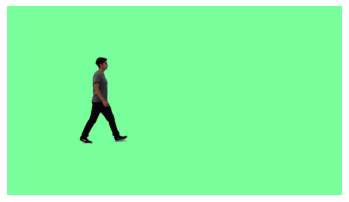

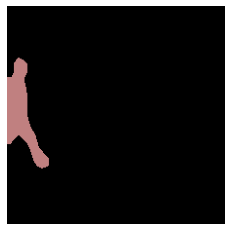

In [33]:
# path = '/home/israel/repos/labelme/examples/bbox_detection/data_annotated/2011_000025.jpg'
# path = '/home/israel/Downloads/pexels-photo-1996333.jpeg'
path = "/home/israel/repos/labelme/examples/test/gait1.jpg"
segment(model, path)

In [68]:
img = Image.open(path)
transform = T.Compose([T.ToTensor()])
img = transform(img)
pred = model([img])
pred_score = list(pred[0]['scores'].detach().numpy())
pred_t = [pred_score.index(x) for x in pred_score if x>0.5][-1]
masks = (pred[0]['masks']>0.5).squeeze().detach().cpu().numpy()
pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]

In [82]:
masks

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])

In [74]:
len(ndim)

2

In [44]:
import numpy as np
list(([list(map(float,pred_boxes[0][0])), list(map(float,pred_boxes[0][1]))]))

[[185.0016632080078, 110.60688781738281], [313.39697265625, 327.4284973144531]]

In [22]:
print(pred_boxes[0][0][0])
type(float(pred_boxes[0][0][0]))

185.00166


float

In [37]:
list(map(float, [1,2,4]))

[1.0, 2.0, 4.0]

In [7]:
 shape = {
      "label": "person",
      "points": [
        [
          191.0,
          107.36900369003689
        ],
        [
          313.0,
          329.36900369003695
        ]
      ],
      "group_id": 'none',
      "shape_type": "rectangle",
      "flags": {}
    }

In [45]:
(shape['points'])

[[191.0, 107.36900369003689], [313.0, 329.36900369003695]]

In [12]:
import os
import re
import datetime
import numpy as np
from itertools import groupby
from skimage import measure
from PIL import Image
from pycocotools import mask

convert = lambda text: int(text) if text.isdigit() else text.lower()
natrual_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]

In [13]:
def resize_binary_mask(array, new_size):
    image = Image.fromarray(array.astype(np.uint8)*255)
    image = image.resize(new_size)
    return np.asarray(image).astype(np.bool_)

def close_contour(contour):
    if not np.array_equal(contour[0], contour[-1]):
        contour = np.vstack((contour, contour[0]))
    return contour

def binary_mask_to_rle(binary_mask):
    rle = {'counts': [], 'size': list(binary_mask.shape)}
    counts = rle.get('counts')
    for i, (value, elements) in enumerate(groupby(binary_mask.ravel(order='F'))):
        if i == 0 and value == 1:
                counts.append(0)
        counts.append(len(list(elements)))

    return rle

def binary_mask_to_polygon(binary_mask, tolerance=0):
    """Converts a binary mask to COCO polygon representation
    Args:
        binary_mask: a 2D binary numpy array where '1's represent the object
        tolerance: Maximum distance from original points of polygon to approximated
            polygonal chain. If tolerance is 0, the original coordinate array is returned.
    """
    polygons = []
    # pad mask to close contours of shapes which start and end at an edge
    padded_binary_mask = np.pad(binary_mask, pad_width=1, mode='constant', constant_values=0)
    contours = measure.find_contours(padded_binary_mask, 0.5)
    contours = np.subtract(contours, 1)
    for contour in contours:
        contour = close_contour(contour)
        contour = measure.approximate_polygon(contour, tolerance)
        if len(contour) < 3:
            continue
        contour = np.flip(contour, axis=1)
        segmentation = contour.ravel().tolist()
        seg = segmentation
        # after padding and subtracting 1 we may get -0.5 points in our segmentation 
        segmentation = [0 if i < 0 else i for i in segmentation]
        polygons.append(segmentation)

    return polygons, seg, contour

In [14]:
poly, seg, con = binary_mask_to_polygon(masks[0],0)

In [22]:
con

array([[146. , 346.5],
       [145. , 346.5],
       [144. , 346.5],
       ...,
       [147. , 345.5],
       [146.5, 346. ],
       [146. , 346.5]])

In [46]:
contour = measure.find_contours(masks[0],0.5)

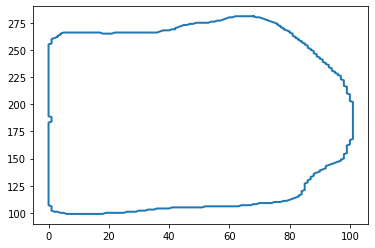

In [34]:
fig, ax = plt.subplots()
for n, cont in enumerate(np.flip(contour, axis=1)):
    ax.plot(cont[:, 1], cont[:, 0], linewidth=2)

In [36]:
from PIL import Image

In [38]:
img = Image.open(path)

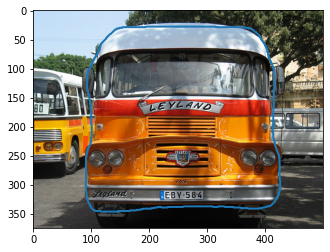

In [47]:
fig, ax = plt.subplots()
for n, cont in enumerate(contour):
    ax.plot(cont[:, 1], cont[:, 0], linewidth=2)
ax.imshow(img)


In [ ]:
import mask2poly

In [ ]:
from mask2poly import binary_mask_to_polygon

In [ ]:
binary_mask_to_polygon(masks[0],0)[2]

In [2]:
from predict_torch import autolabeling

In [3]:
model = autolabeling()

In [19]:
path = "/home/israel/repos/labelme/examples/test/gait1.jpg"
mask, bbox, classes = model.get_prediction(path, 0.5)

In [20]:
mask

array([[False, False, False, ..., False, False, False]])

In [5]:
pred

[{'label': 'bus',
  'points': [(347.0, 146.0),
   (347.0, 136.0),
   (347.0, 126.0),
   (347.0, 116.0),
   (345.0, 106.0),
   (337.0, 98.0),
   (327.0, 93.0),
   (317.0, 91.0),
   (307.0, 90.0),
   (297.0, 90.0),
   (287.0, 90.0),
   (277.0, 90.0),
   (267.0, 90.0),
   (257.0, 90.0),
   (247.0, 91.0),
   (237.0, 94.0),
   (227.0, 98.0),
   (217.0, 100.0),
   (207.0, 100.0),
   (197.0, 100.0),
   (187.0, 99.0),
   (177.0, 99.0),
   (167.0, 98.0),
   (157.0, 97.0),
   (147.0, 95.0),
   (137.0, 93.0),
   (127.0, 92.0),
   (117.0, 92.0),
   (107.0, 93.0),
   (97.0, 98.0),
   (87.0, 102.0),
   (77.0, 108.0),
   (67.0, 112.0),
   (57.0, 116.0),
   (47.0, 125.0),
   (38.0, 135.0),
   (30.0, 145.0),
   (28.0, 155.0),
   (28.0, 165.0),
   (28.0, 175.0),
   (28.0, 185.0),
   (27.0, 195.0),
   (27.0, 205.0),
   (27.0, 215.0),
   (27.0, 225.0),
   (27.0, 235.0),
   (27.0, 245.0),
   (27.0, 255.0),
   (27.0, 265.0),
   (27.0, 275.0),
   (27.0, 285.0),
   (27.0, 295.0),
   (27.0, 305.0),
   (28.0, 3

In [21]:
import matplotlib.pyplot as plt

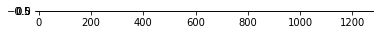

In [22]:
plt.imshow(mask)
plt.show()